### Tree-based Machine Learning Models
In this jupyter notebook, we will practice the topics covered in the lectures. Specifically, we will do hands-on practice of:
- load and prepare data for machine learning model training
- train and test tree-based models (decision tree classifier/regressor, randomforest classifier/regressor)
- visualize and interpret model performance

In [2]:
# packages for data 
import numpy as np
import pandas as pd
from collections import Counter

# packages for machine learning 
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 

# packages for plot and visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz 
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
%matplotlib inline

In the following tasks, we will implement several tree-based models using Python3 and scikit-learn: https://scikit-learn.org/stable/. Let's first check the version of python and sklearn.

In [3]:
# Check your python version, we need Python3 to run the following code
from platform import python_version
print(python_version())

3.11.4


In [4]:
# Check the version of your sklearn package
# In coding and debugging, make sure you refer to the **correct version of the documentation**
sklearn.__version__

'1.3.0'

### Train and Test a Decision Tree classifier

In this task, we will load a dataset, train a decision tree classifier on the training set, and test the classifier performance on the testing set. Here are the suggested steps: <br>
1. Import the necessary packages. <br>

**Prepare data**<br><br>
2. <u>_Load_</u> the iris dataset. <br>
    ---> More information about the dataset can be found here: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.<br>
3. Prepare the <u>_input feature matrix and the target variable_</u>. Then, split data into training and testing set.
<br><br>

**Model training and evaluation**<br>
4. Create a DecisionTreeClassifier object. <br>
    ---> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. <br>
    ---> Let's set criterion = "entropy" and random_state = 42, and keep all the other parameters with the default value.<br>
5. <u>_Fit_</u> the DecisionTreeClassifier on the training set.<br>
6. <u>_Evaluate_</u> the DecisionTreeClassifier performance using the "score" function on the testing set. 
<br><br>

**Visualization and result analysis** <br>
7. Visualize the fitted DecisionTreeClassifier and interpret its performance. <br>
    ---> More information on plotting decision trees can be found here: https://scikit-learn.org/stable/modules/tree.html
<br><br>

**Exploration**<br>
8. Finally, play with different values of model parameters. Explore how the model performance change with different parameter settings and how the visualized trees change.<br>

In [5]:
# 1. import related packages
from sklearn.datasets import load_iris

#### Prepare data

In [6]:
# 2. load the dataset
iris = load_iris()

In [7]:
# 2. display the dataset as a pandas dataframe
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# if the target variable is discrete, check the label distribution of the target variable
Counter(df_iris.target)

Counter({0: 50, 1: 50, 2: 50})

In [9]:
# 3. Get the input feature matrix and target variable, prepare for model fitting
X,y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [10]:
# 3. split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

#### Model training and evaluation

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
# 4. Create a DecisionTreeClassifier object.  
# set criterion = "entropy" and random_state = 42, and keep all the other parameters with the default value.
dt_clf = DecisionTreeClassifier(random_state=42,criterion='entropy') 

In [13]:
# 5. "fit" the DecisionTreeClassifier on the training set
dt_clf = dt_clf.fit(X_train, y_train)

In [14]:
# 6. Evaluate the DecisionTreeClassifier performance on the testing set
# Round it to the 3rd decimal (e.g., 0.800, 0.850, 0.862).
np.round(dt_clf.score(X_test,y_test),3)

0.978

#### Visualization and result analysis

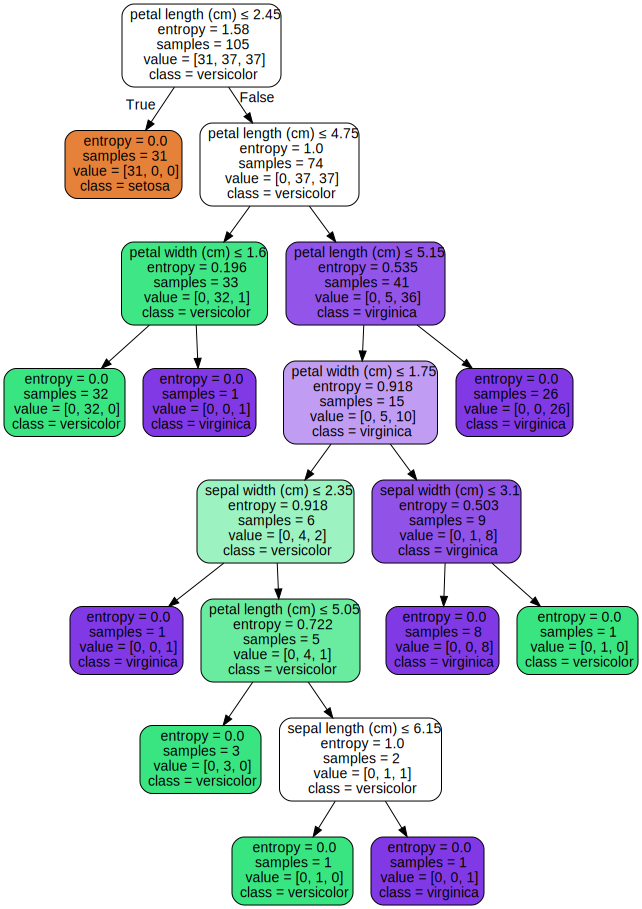

In [29]:
# 7. Visualize the fitted DecisionTreeClassifier
# conda install python-graphviz
dot_data = tree.export_graphviz(dt_clf, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [17]:
# check and interpret feature importance
pd.DataFrame([np.round(dt_clf.feature_importances_,2)], columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.01,0.04,0.89,0.06


In [18]:
# depth of the fitted tree
dt_clf.get_depth()

7

In [19]:
# number of leaves in the fitted tree
dt_clf.get_n_leaves()

10

In [20]:
# predict the class labels for the given samples
dt_clf.predict(X_test[:10])

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [21]:
# predict the class probabilities for the given samples
dt_clf.predict_proba(X_test[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [22]:
dt_clf.decision_path(X_test[:1]).toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

#### Exploration

In [36]:
# 8. Finally, play with different parameter settings and explore how the model performance changes.
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Visualize and compare different decision trees.
dt_clf_gini = DecisionTreeClassifier(random_state=42, criterion='gini')
dt_clf_gini = dt_clf_gini.fit(X_train, y_train)
np.round(dt_clf_gini.score(X_test, y_test), 3)

1.0

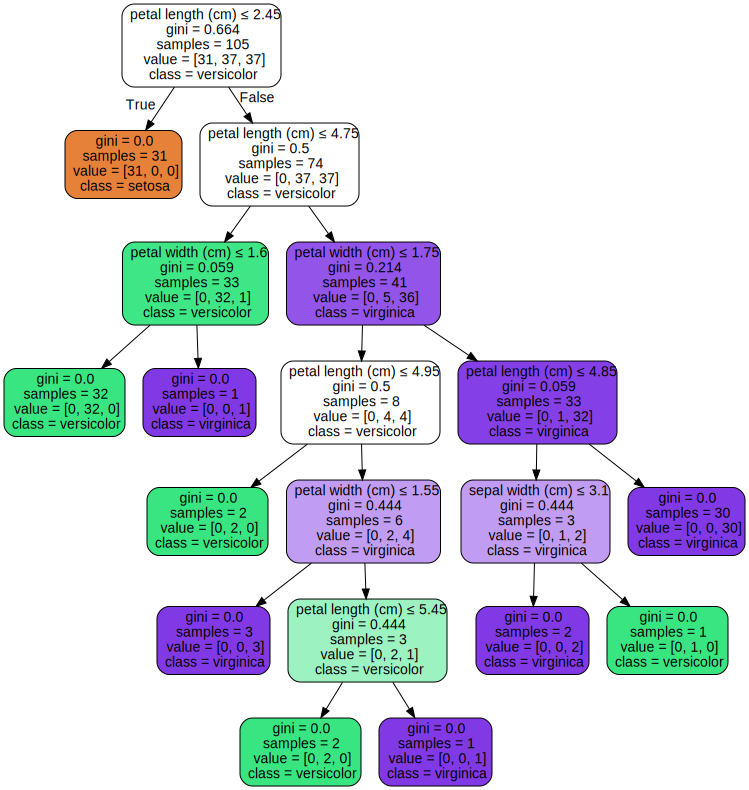

In [37]:
dot_data_gini = tree.export_graphviz(dt_clf_gini, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph_gini = graphviz.Source(dot_data_gini)
graph_gini

In [40]:
pd.DataFrame([np.round(dt_clf_gini.feature_importances_, 2)], columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,0.02,0.89,0.09


I change the parameter "criterion" from "entropy" to "gini", and the results seem like quite the same. By generating the visualization, we can see the "gini" actually result in a different way of classification, and improve the importance of "patal length" in this model. 

In [41]:
# check the influence of max_depth
dt_clf_dep = DecisionTreeClassifier(random_state=42, criterion='entropy',\
                                    max_depth=5) # the original model have depth of 7
dt_clf_dep = dt_clf_dep.fit(X_train, y_train)
np.round(dt_clf_dep.score(X_test, y_test), 3)

0.978

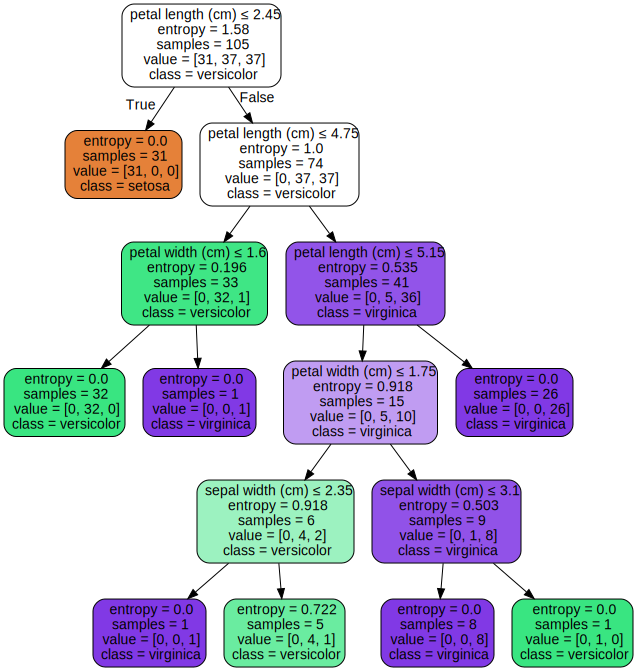

In [42]:
dot_data_dep = tree.export_graphviz(dt_clf_dep, out_file=None,
                                     feature_names=iris.feature_names,
                                     class_names=iris.target_names,
                                     filled=True, rounded=True,
                                     special_characters=True)
graph_dep = graphviz.Source(dot_data_dep)
graph_dep

Compared to depth=7, when we set max_depth=5, the first four steps are totally the same. Changes happen from the fifth step, which end the split arbitarily.

In [38]:
# list all the attributes and methods
# dir(dt_clf)

In [39]:
# help(dt_clf)

#### Discussion

The fitted decision tree classifier is: <br>
   - a tree with depth of 7  
   - it achieved 0.978 accuracy on the testing set
   - petal length is the most important feature in distinguishing samples of three classes, this makes sense because in the biological context of flowers, variation in petal length is a result of evolutionary adaptations, possibly for attracting different pollinators or for better adaptation to different environments.
   - sepal length seems to be the most unimportant feature because the sepal's primary function is to protect the flower bud, and this function does not require as much specialization as petals which are directly involved in reproduction.

After exploring different parameter settings, we find that:
   - max_depth helps control the maximum depth of the tree and thus avoids overfitting. A deeper tree can create more complex decision rules and may fit the training data very well, but it could perform poorly on unseen data due to overfitting. By limiting the depth, we ensure that the model does not learn the training data too precisely, allowing it to generalize better to new data.

### Decision tree regressor [group-coding, update the code to your github repo, and post your discussion results on ed]
- Please follow the previous steps of building, evaluating, and visualizing decision tree classifier to build a decision tree regressor with the diabetes dataset. 
    - Decision tree regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
    - Diabetes dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
- Visualize to show how decision tree regressor is different from decision tree classifier.
    

In [23]:
# 1. import the additional related packages
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

In [24]:
# 2. load the dataset
diab = load_diabetes()

In [25]:
# 2. display the dataset as a pandas dataframe
df_diab = pd.DataFrame(diab.data, columns=diab.feature_names)
df_diab['target'] = diab.target
df_diab

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Text(0, 0.5, '#samples')

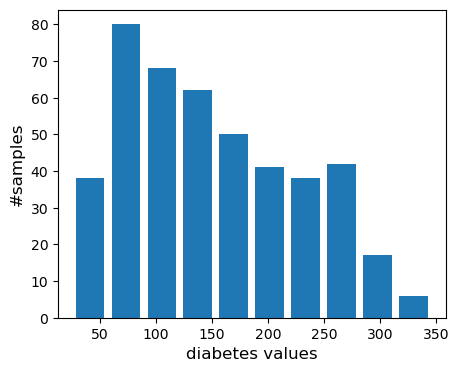

In [26]:
# if the target variable is continuous, check the value distribution of the target variable
plt.hist(df_diab.target, rwidth=0.8);
plt.xlabel('diabetes values', fontsize=12)
plt.ylabel("#samples", fontsize=12)

In [27]:
# 3. Get the input feature matrix and target variables, prepare for model fitting
X,y = diab.data, diab.target
X.shape, y.shape

((442, 10), (442,))

In [ ]:
# 3. split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [50]:
# 4/5/6: fit and evaluate the model performance on the testing set
# criterion = 'squared_error', 'friedman_mse', 'poisson', 'absolute_error'
dt_diab = DecisionTreeRegressor(random_state=42, criterion='squared_error')
dt_diab = dt_diab.fit(X_train, y_train)
np.round(dt_diab.score(X_test, y_test), 2)

-0.06

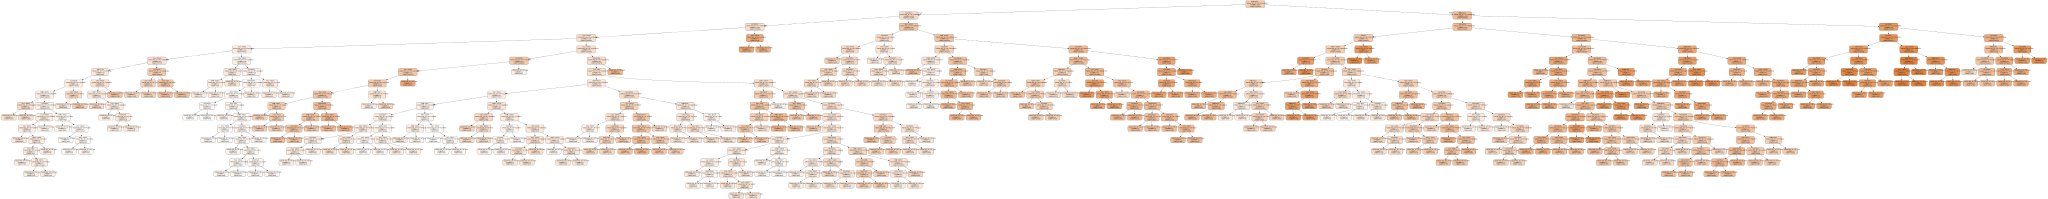

In [53]:
# 7. Visualize the fitted DecisionTreeRegressor
dot_data = tree.export_graphviz(dt_diab, out_file=None,
                                feature_names=diab.feature_names,
                                class_names=diab.target,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [57]:
# check and interpret feature importance
pd.DataFrame([np.round(dt_diab.feature_importances_,2)], columns=diab.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.06,0.0,0.44,0.1,0.07,0.07,0.03,0.03,0.13,0.06


In [58]:
# depth of the fitted tree
dt_diab.get_depth()

17

In [59]:
# number of leaves in the fitted tree
dt_diab.get_n_leaves()

303

In [60]:
# predict the regression value for the given samples
dt_diab.predict(X_test[:10])

array([198., 221., 198., 310., 139., 253., 233., 249., 131., 128.])

In [62]:
dt_diab.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [63]:
# 8. Finally, play with different parameter settings and explore how model performance changes. 
# Visualize and compare different decision trees.
# change the min_sample_split parameter
dt_diab = DecisionTreeRegressor(random_state=42, criterion='squared_error', min_samples_split=5)
dt_diab = dt_diab.fit(X_train, y_train)
np.round(dt_diab.score(X_test, y_test), 2)

-0.12

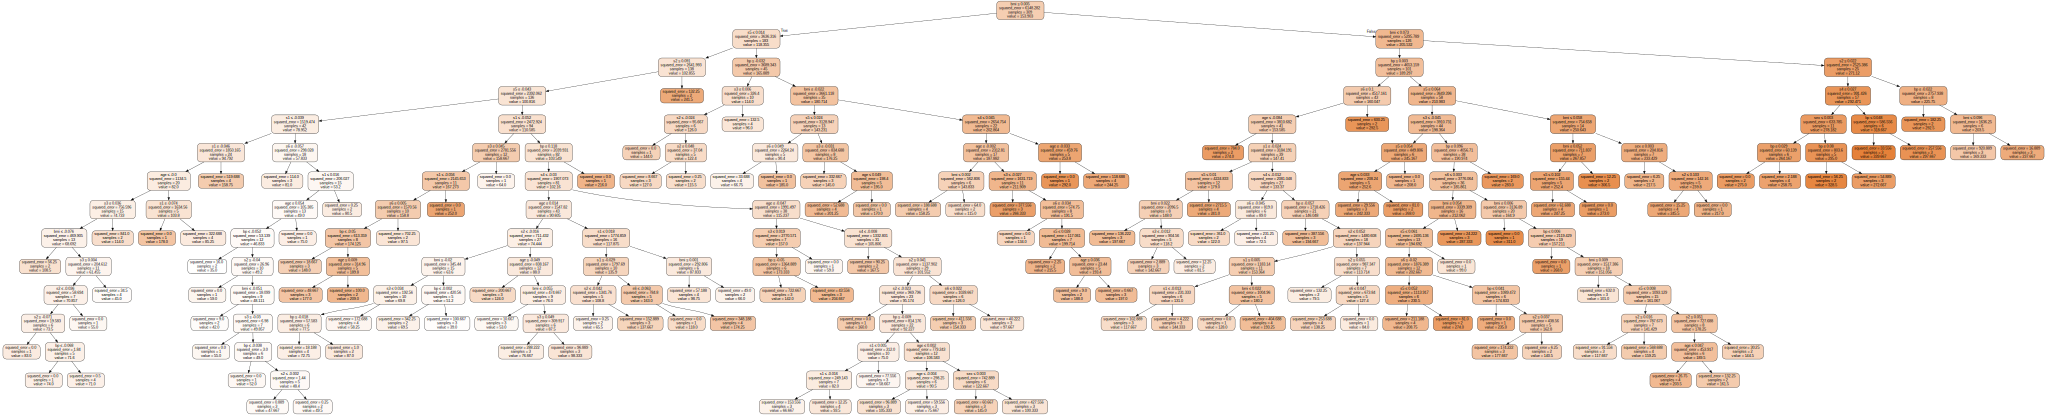

In [64]:
dot_data = tree.export_graphviz(dt_diab, out_file=None,
                                feature_names=diab.feature_names,
                                class_names=diab.target,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [65]:
pd.DataFrame([np.round(dt_diab.feature_importances_, 2)], columns=diab.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.06,0.0,0.45,0.1,0.07,0.06,0.04,0.03,0.14,0.06


In [ ]:
# list all the attributes and methods
# dir(dt_clf)

In [ ]:
# help(dt_clf)

#### Discussion
- compare decision tree classifier and regressor, what differences do you observe?
- what parameter settings have you explored and how does each parameter affect the regressor performance?
- can you interpret the feature importance under the context of this task?
- what else do you find interesting?

Answers: 
- In response to the first question, I want to present 2 of my obervations: (1) The problem types is different. classifier deals with problems where the output is a category, while regressor deals with continuous outcome variables. (2) The splitting criteria is different. Gini Impurity or Entropy used in classifier help in measuring the disorder or impurity in the subsets, while MSE or MAE used in regressor is to minimize the difference between the actual and predictied values in each node (I searched this on Google).
- By comparing the illustration of the origin regressor example and the current example, we can see that the split will stop when the sample number is less than 5 in the latter condition. Setting min_samples_split will reduce the performance of the model. Additionally, the feature importance of bmi increased. min_samples_split sets a threshold on the minimum number of samples required to split an internal node, and this prevents the tree to grow too complex. If a node is split only when there are enough samples, it avoids creating branches and rules for noise or outliers in the data, thereby maintaining a more generalizable structure.
- Bmi is the most important feature in predicting diabetes. This makes sense because higher bmi indicated obesity, which increases the opportunity of suffer from diseases such as diabetes.
-  I think setting thresholds on both max_depth and min_sample_split are ways for pruning and avoid overfitting, enforcing the model don't to be too acurrate to capture every tiny difference between samples.

### Random Forest classifer/regressor [take-home assignment, update to your github repo]
For a random forest classifier:
- use the prepared iris dataset (X_train, y_train, X_test, y_test) 
- train a [RandomForestClassifier] on the training set
    - (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- report the model performance on the testing set
- compare the performance of a decision tree classifier and a random forest classifier 

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# train a random forest classier
# set n_estimators = 1000, criterion = 'entropy', random_state = 42, and keep all the other parameters with the default value.
X, y = iris.data, iris.target
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

rf_clf = RandomForestClassifier(random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)

In [68]:
# evaluate the random forest classifier on test set (round to the 3rd decimal, e.g., 0.971, 0.020)
np.round(rf_clf.score(X_test, y_test), 3)

1.0

In [71]:
# try different model parameters (e.g., n_estimators) and check the results
rf_clf = RandomForestClassifier(random_state=42, min_samples_leaf=100)
rf_clf = rf_clf.fit(X_train, y_train)
np.round(rf_clf.score(X_test, y_test), 3)

0.289

#### Discussion
After comparing decision tree classifier and random forest classifier, share your thoughts and insights. E.g.,
- which performed better?
- how does model parameter affect the model performance in the random forest classifier?

Answers:
- The random forest classifier performs better. Random Forest is an ensemble method, meaning it combines the predictions from multiple machine learning algorithms to make more accurate predictions than any individual model. 
- When I set the min_sample_leaf parameter larger, and the accuracy of the model decreased. min_samples_split sets a threshold on the minimum number of samples required to split an internal node, and this prevents the tree from growing too complex. In some situations, it can help prevent overfitting and make the model more generalizable, but when the value is too high, the model is over-simplified, which reduces the accuracy of the model.

### [Optional] take-home practice

The following part provides a practice of calculating entropy and information gain from scratch. You can refer to the slides to review these concepts. 

For each of the designed function, we provide the function header, docstring, and expected results for the running examples. You can use the running example to check the correctness of your code. We have included all the necessary packages, but you are free to add any additional package when necessary. <br>

In [ ]:
def get_proportion(ct):
    """
    Calculate the class distribution based on the number of samples in each class.
    ct: a list of integers indicating the number of samples in each class
        binary class: ct = [ct1, ct2]
        multi-class: ct = [ct1, ct2, ...]
    return: a list/array of numbers indicating the proportions of samples in each class
    """
    ### your code here
    

In [ ]:
get_proportion([5,5])

array([0.5, 0.5])

In [ ]:
get_proportion([3,2])

array([0.6, 0.4])

In [ ]:
def calculate_entropy(prop):
    """
    Calculate the entropy at each node.
    prop: a list of numbers indicating the proportion of samples in each class
        binary case: [p, 1-p]
        multi-class cases: [p1, p2, ...pn], where p1 + p2 + ... + pn = 1
    return:
        a float representing the entropy for the current sample distribution
        please round to 3 digits after the decimal point 
    """
    ### your code here
    

In [ ]:
calculate_entropy([0.5,0.5])

1.0

In [ ]:
calculate_entropy([0.6,0.4])

0.971

In [ ]:
calculate_entropy(get_proportion([3,5,2]))

1.485

In [ ]:
def calculate_IG(root_counts, leaves_counts):
    """
    Calculate information gain of splitting on a specific feature.
    root_counts:
        a list if integers indicating the number of samples for each class at the root node
        e.g., root_counts = [3,2]
    leaves_counts:
        a list of lists, each sublist shows the sample distribution at each leaf node
        E.g., in the slides, if we split on X1, leaves_counts = [[2,1],[1,1]]
    return: 
        a float indicating the information gain of splitting on the current decision node:
        please round to the 3rd decimal, e.g., 0.971, 0.020
    note: 
        you will use the above helper functions in the calculation
    """
    ### your code here
    

In [ ]:
# running example for spliting on X1
calculate_IG([3,2], [[2,1], [1,1]])

0.02

In [ ]:
# running example for spliting on X2
calculate_IG([3,2], [[2,2], [1,0]])

0.171

In [ ]:
# running example for spliting on X3
calculate_IG([3,2], [[3,0], [0,2]])

0.971

In [ ]:
# running example for spliting on Outlook
calculate_IG([9,5], [[2,3], [4,0], [3,2]])

0.246